Introducción:
Los Juegos Olímpicos son un evento multideportivo internacional que se celebra cada cuatro años y en el que participan miles de atletas de todo el mundo en diversas competiciones deportivas. Los Juegos Olímpicos son uno de los eventos deportivos más importantes y prestigiosos a nivel mundial, y promueven la unidad, la amistad y el juego. 
El símbolo icónico de los Juegos Olímpicos son los cinco anillos entrelazados, que representan los cinco continentes (África, América, Asia, Europa y Oceanía). Los colores de los anillos (azul, amarillo, negro, verde y rojo) se eligieron porque la bandera de cada nación contiene al menos uno de estos colores.
Medallas olímpicas: se otorgan medallas de oro, plata y bronce a los tres mejores atletas o equipos de cada evento.

DataSet: se obtiene un Dataset de los juegos olímpicos con el detalle de los deportistas, si ganaron alguna medalla y en qué tipo de juegos.
Se busca predecir a futuro que probabilidad tiene cada deportista de ganar una medalla.

In [80]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Define el directorio de trabajo a la ruta deseada
nueva_ruta = 'C:\\Users\\Usuario\\Desktop\\pc escrittorio\\Mel\\Cursos\\ciencia de datos_CODERHOUSE\\1.Data Science_2024\\Proyecto-Data-Science-I'
os.chdir(nueva_ruta)

# Levanto el archivo 
df = pd.read_csv("dataset_olympics.csv",sep = ',')
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [14]:
# Explorando un poco el DataFrame
print('Cantidad de filas: ',df.shape[0]) # atributo shape elemento 0 es fila
print('Cantidad de columnas: ',df.shape[1]) # por defecto el 1 es columna
df["Medal"].value_counts()
max_ID = df["ID"].max()
print("ID máximo: ", max_ID) # ID máximo:  35.658

# Revisión de datos nulos




Cantidad de filas:  70000
Cantidad de columnas:  15
ID máximo:  35658


In [104]:
df["ID_persona"].value_counts()

ID_persona
21462    29
26196    27
11951    27
18255    26
14170    24
         ..
35654     1
35655     1
12622     1
12624     1
2         1
Name: count, Length: 35658, dtype: int64

In [18]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [31]:
# Renombramos las columnas

nombres_columnas = {"ID": "ID_persona", 
                    "Name":"Nombre", 
                    "Sex":"Sexo",
                    "Age":"Años",
                    "Height":"Altura",
                    "Weight":"Peso",
                    "Team":"Equipo",
                    "NOC":"Id equipo",
                    "Games":"Juegos",
                    "Year":"Año Juego",
                    "Season":"Tipo de juego",
                    "City":"Ciudad",
                    "Sport":"Deporte",
                    "Event":"Evento",
                    "Medal":"Medalla"}

                    


In [32]:
df = df.rename(columns = nombres_columnas) 
df.head()

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [33]:
print(df.columns)


Index(['ID_persona', 'Nombre', 'Sexo', 'Años', 'Altura', 'Peso', 'Equipo',
       'Id equipo', 'Juegos', 'Año Juego', 'Tipo de juego', 'Ciudad',
       'Deporte', 'Evento', 'Medalla'],
      dtype='object')


In [42]:
# ANALIZANDO DATOS NULOS
# # print(df.info())
print('Detalle de Nulos:')
print(df.isnull().sum())

Detalle de Nulos:
ID_persona           0
Nombre               0
Sexo                 0
Años              2732
Altura           16254
Peso             17101
Equipo               0
Id equipo            0
Juegos               0
Año Juego            0
Tipo de juego        0
Ciudad               0
Deporte              0
Evento               0
Medalla          60310
dtype: int64


In [37]:
# Usando el método describe() para explorar el dataset:
print(df.describe())

         ID_persona          Años        Altura          Peso     Año Juego
count  70000.000000  67268.000000  53746.000000  52899.000000  70000.000000
mean   18081.846986     25.644645    175.505303     70.900216   1977.766457
std    10235.613253      6.485239     10.384203     14.217489     30.103306
min        1.000000     11.000000    127.000000     25.000000   1896.000000
25%     9325.750000     21.000000    168.000000     61.000000   1960.000000
50%    18032.000000     25.000000    175.000000     70.000000   1984.000000
75%    26978.000000     28.000000    183.000000     79.000000   2002.000000
max    35658.000000     88.000000    223.000000    214.000000   2016.000000


In [45]:
nun_missing = (df[['Años','Altura','Peso','Medalla']] == 0).sum()
print(nun_missing)

Años       0
Altura     0
Peso       0
Medalla    0
dtype: int64


In [50]:
# Para darle tratamiento como nulo, reemplazamos los '0' con 'nan'
df['Altura'] = df['Altura'].replace( '', np.nan)
# Cuántos nulos me quedaron en cada variable?
print('Cantidad de nulos:')
print(df.isnull().sum())

Cantidad de nulos:
ID_persona           0
Nombre               0
Sexo                 0
Años              2732
Altura           16254
Peso             17101
Equipo               0
Id equipo            0
Juegos               0
Año Juego            0
Tipo de juego        0
Ciudad               0
Deporte              0
Evento               0
Medalla          60310
dtype: int64


In [52]:
# Se reemplazan los valores de las columnas Años, Altura y Peso por el promedio. Se elije esa estrategia por contar con muchos datos ausentes
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number])

# Calcular el promedio solo en las columnas numéricas
promedios = columnas_numericas.mean()

# Reemplazar los NaN por el promedio de cada columna numérica
df[columnas_numericas.columns] = columnas_numericas.fillna(promedios)


In [56]:
df

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.505303,70.900216,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.505303,70.900216,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,175.505303,70.900216,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,175.505303,70.900216,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.000000,65.000000,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.000000,65.000000,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


In [54]:
# Se verifica que no queden nulos
print('Detalle de Nulos:')
print(df.isnull().sum())

Detalle de Nulos:
ID_persona           0
Nombre               0
Sexo                 0
Años                 0
Altura               0
Peso                 0
Equipo               0
Id equipo            0
Juegos               0
Año Juego            0
Tipo de juego        0
Ciudad               0
Deporte              0
Evento               0
Medalla          60310
dtype: int64


In [57]:
# se reemplaza en columna "Medalla" los NaN por "Sin Medalla"
df['Medalla'] = df['Medalla'].fillna( 'Sin Medalla')

In [59]:
df['Medalla'] = df['Medalla'].replace('Sin Medalla', "No obtuvo")


In [94]:
reemplazos_medallas = {
    'Bronze':'Bronce',
    'Silver':'Plata',
    'Gold':'Oro'
}
df['Medalla'] = df['Medalla'].replace(reemplazos_medallas)
df.head(3)

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla,Obtuvo_medalla
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.505303,70.900216,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo,0


In [60]:
df

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo
2,3,Gunnar Nielsen Aaby,M,24.0,175.505303,70.900216,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo
3,4,Edgar Lindenau Aabye,M,34.0,175.505303,70.900216,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No obtuvo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,175.505303,70.900216,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No obtuvo
69996,35656,Stuart Fitzsimmons,M,19.0,175.505303,70.900216,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,No obtuvo
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.000000,65.000000,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",No obtuvo
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.000000,65.000000,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",No obtuvo


In [68]:
print(df.groupby('Medalla').size())


Medalla
Bronze        3208
Gold          3292
No obtuvo    60310
Silver        3190
dtype: int64


In [85]:
# Crear un mapeo de los valores de la columna 'Medalla'
mapeo = {
    'No obtuvo': 0,
    'Bronze': 1,
    'Silver': 1,
    'Gold': 1
}

# Incorporar la nueva columna usando map()
df['Obtuvo_medalla'] = df['Medalla'].map(mapeo)

print(df)


       ID_persona                          Nombre Sexo  Años      Altura  \
0               1                       A Dijiang    M  24.0  180.000000   
1               2                        A Lamusi    M  23.0  170.000000   
2               3             Gunnar Nielsen Aaby    M  24.0  175.505303   
3               4            Edgar Lindenau Aabye    M  34.0  175.505303   
4               5        Christine Jacoba Aaftink    F  21.0  185.000000   
...           ...                             ...  ...   ...         ...   
69995       35656              Stuart Fitzsimmons    M  19.0  175.505303   
69996       35656              Stuart Fitzsimmons    M  19.0  175.505303   
69997       35657  David Thomas "Dave" Fitzsimons    M  26.0  170.000000   
69998       35657  David Thomas "Dave" Fitzsimons    M  30.0  170.000000   
69999       35658                    Marek Fiurek    M  23.0  180.000000   

            Peso          Equipo Id equipo       Juegos  Año Juego  \
0      80.000000 

In [96]:
# Crear un mapeo de los valores de la columna 'Medalla' para tipo de medalla según es Bronce, Oro o Plata
mapeo_podio = {
    'No obtuvo': 0,
    'Bronce': 3,
    'Plata': 2,
    'Oro': 1
}

# Incorporar la nueva columna usando map()
df['Podio'] = df['Medalla'].map(mapeo_podio)

df.head(15)

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla,Obtuvo_medalla,Podio
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo,0,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.505303,70.900216,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo,0,0
3,4,Edgar Lindenau Aabye,M,34.0,175.505303,70.900216,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Oro,1,1
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No obtuvo,0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0
7,5,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No obtuvo,0,0
8,5,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0
9,5,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No obtuvo,0,0


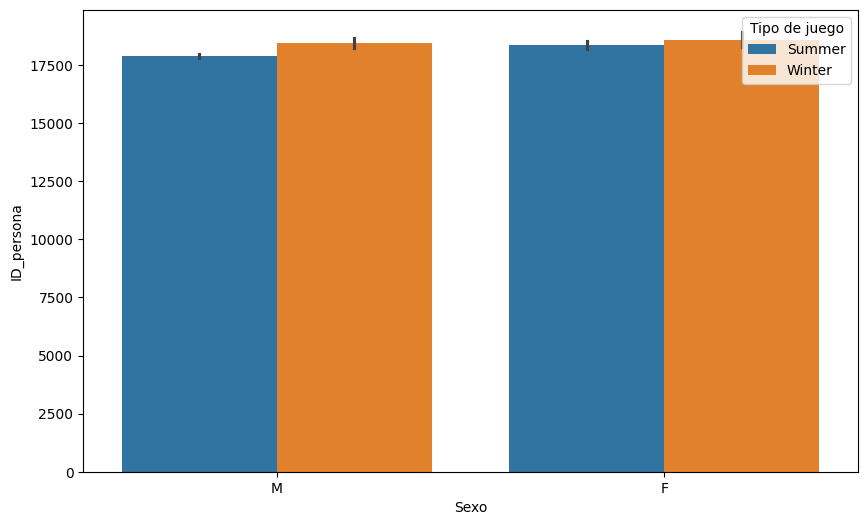

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'ID_persona', x = 'Sexo', hue = 'Tipo de juego', data = df)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23716\1021340601.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


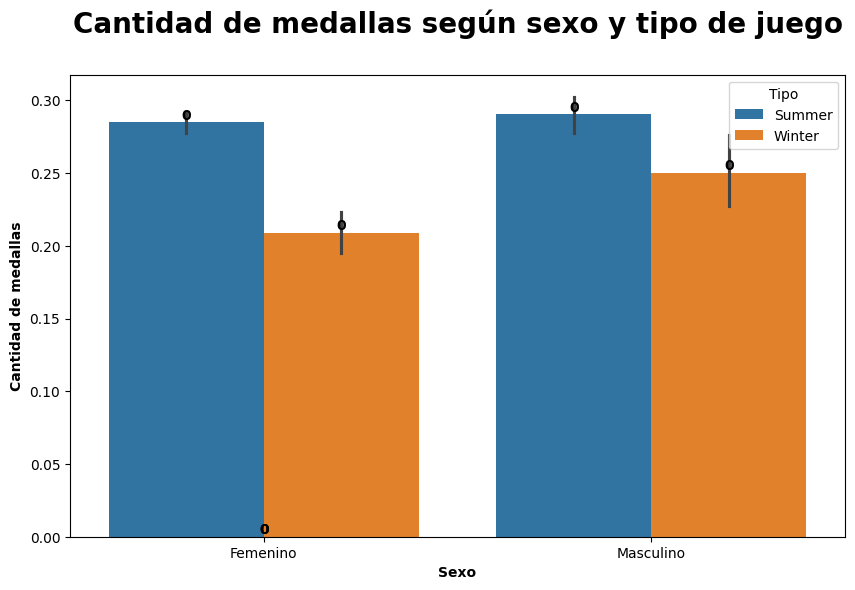

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Podio', x = 'Sexo', hue = 'Tipo de juego', data = df)
plt.title("Cantidad de medallas según sexo y tipo de juego", 
             fontsize = 20, fontweight = 'bold', pad = 30)
plt.xlabel('Sexo', fontweight = 'bold')
nuevas_etiquetas_x = ["Femenino", "Masculino"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de medallas', fontweight = 'bold')
plt.legend(title = 'Tipo')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()